# 2209261 Basic Programming NLP
## Lab 11 : NLP Part I : Text Processing
## Created by : 6730084521 Chatrphol Ovanonchai

# Before We Start

In [30]:
# Install some NLP library
!pip install pythainlp
!pip install nltk
!pip install attacut
!pip install seaborn

## Text Processing Exercise

เขียนฟังก์ชันที่นับจำนวนคำภาษาไทยจากข้อความที่เก็บอยู่ในสตริง news_article โดยที่ต้องไม่นับ เครื่องหมายวรรคตอน ตัวเลข และคำหยุด
จงเขียน Python code เพื่อ ตอบคำถามข้างล่างนี้

1. สตริงที่ให้มีขนาด vocabulary (จำนวนคำแบบไม่นับคำซ้ำ)อยู่ที่เท่าไร
2. คำใดพบบ่อยที่สุด 10 อันดับในสตริงที่ให้มา (เเสดงออกมาในรูปแบบกราฟเเท่ง)
3. ไบแกรมใดพบบ่อยที่สุด 10 อันดับในสตริงที่ให้มา (เเสดงออกมาในรูปแบบกราฟเเท่ง)
4. หน้าที่ของคำชนิดใด(Part of Speech)พบบ่อยที่สุด ให้ใช้ Tag ประเภท  Universal POS ta  (เเสดงออกมาในรูปแบบกราฟเเท่ง)
5. News article นี้มีท้ังหมดกี่ประโยค (sentence)

## 0. Preprocess News Article
- ลบอักษณะพิเศษ เช่น %,? ให้เหลือเเค่ตัวเลข ตัวอักษรไทยเเละอังกฤษ
- ตัดคำ (word tokenize) ด้วย newMM บน PyThaiNLP
- คำตอบจะอยู่ในรูป list of tokens (words)
- ลบ stopword ออกจาก list

In [46]:
import re
import pythainlp
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# ที่มา: https://thestandard.co/us-prepares-to-offer-billionaire-tax/
news_article = """ปัญหาความเหลื่อมล้ำไม่ได้เกิดขึ้นแค่ในประเทศไทย แต่เกิดขึ้นกับประเทศมหาอำนาจอย่างสหรัฐฯ
เช่นเดียวกัน ทางออกที่สหรัฐฯ กำลังจะทำคือการร่างกฎหมาย ‘การเก็บภาษีมหาเศรษฐี’ ขึ้นมาเพื่อแก้ปัญหานี้
 ซึ่งถูกเสนอโดยพรรคเดโมแครต เพื่อที่จะนำเงินจากภาษีเหล่านี้มาใช้กับโครงข่ายรองรับทางสังคม (Social
Safety Net) ไม่ว่าจะเป็นการช่วยเหลือผู้ที่ได้รับผลกระทบจากวิกฤตต่างๆ ผู้ที่ตกงาน ผู้ด้อยโอกาส เป็นต้น
มหาเศรษฐีที่รวยที่สุดในโลก ณ เวลานี้คือ อีลอน มัสก์ โดยบริษัทรถยนต์ไฟฟ้าของเขาอย่าง Tesla
แทบจะเรียกได้ว่าถูกสร้างขึ้นมาด้วยเงินของรัฐบาลเลยก็ว่าได้ เนื่องจากหลายปีที่ผ่านมารัฐบาลต้อง
การจูงใจให้ประชาชนใช้รถยนต์ไฟฟ้ามากขึ้น จึงออกนโยบายต่างๆ เพื่อสนับสนุน
โดยบริษัทที่ได้รับ ผลประโยชน์ไปเต็มๆ เลยคือ Tesla ซึ่งผลกำไรส่วนใหญ่ในปัจจุบันของบริษัทมาจากการขายเครดิตรถยนต์ไฟฟ้า
ที่รัฐบาลกำหนดให้ผู้ผลิตรถยนต์ต่างๆ ต้องผลิตรถยนต์ไฟฟ้าให้ได้ตามจำนวนที่กำหนด ถ้าผลิตไม่ถึงที่กำหนดจะ
ต้องจ่ายค่าปรับเป็นจำนวนมหาศาล ทำให้ผู้ผลิตรถยนต์รายอื่นๆ ต้องมาซื้อเครดิตจาก Tesla แทน เนื่องจาก
Tesla มีการผลิตรถยนต์ไฟฟ้าไปแล้วเป็นจำนวนมาก จนสามารถขายเครดิตให้กับผู้ผลิตรายอื่นๆ ได้อย่าง
เหลือเฟือ ซึ่งการสนับสนุนของรัฐบาลนี้อาจเป็นเหตุผลที่ว่า ทำไม Tesla ถึงมีมูลค่ามากกว่า Toyota ถึง 3
เท่า ทั้งๆ ที่ขายรถยนต์ได้น้อยกว่ามาก

นอกจากนั้นองค์กรไม่แสวงหาผลกำไรอย่าง ProPublica ได้เปิดเผยว่า
 อีลอน มัสก์ ยังเป็น 1 ในเหล่ามหาเศรษฐีที่ร่ำรวยที่สุดในโลก ที่ใช้วิธีการต่างๆ เพื่อหลีกเลี่ยงการ
จ่ายภาษีเงินได้บุคคลธรรมดาอีกด้วย อย่างมหาเศรษฐีอีกคนที่ใช้วิธีการเดียวกันนี้คือ เจฟฟ์ เบโซส์
เจ้าของ Amazon และบริษัทท่องอวกาศอย่าง Blue Origin
ล่าสุด มัสก์ออกมาเคลื่อนไหวเกี่ยวกับประเด็นนี้
โดยทวีตว่า ‘การเก็บภาษีเหล่าเศรษฐี’ จะช่วยแก้ปัญหาหนี้สินของรัฐบาลได้เพียงเล็กน้อยเท่านั้น สิ่งที่
ควรแก้ไขจริงๆ คือการใช้จ่ายของรัฐบาลมากกว่า พร้อมกล่าวเพิ่มเติมว่า หากรัฐเก็บภาษีจากเหล่ามหาเศรษฐี
ได้ครบ 100% แล้วก็ยังไม่พอต่อการใช้หนี้อยู่ดี และต้องหันไปเก็บภาษีเพิ่มกับประชาชนทั่วไปในภายหลัง โดย
ทวีตเพิ่มเติมว่าหากเก็บจากเหล่ามหาเศรษฐีแล้วก็ยังได้เพียงแค่ 10% ของ 3.5 ล้านล้านดอลลาร์ของหนี้ที่มี
อยู่เท่านั้น และอีก 90% ที่เหลือจะเก็บจากใคร ก็เก็บจาก ‘คุณ’ ไง

ทำไมภาษีมหาเศรษฐีจึงจำเป็น?

มหาเศรษฐีระดับโลกหลายคนใช้การหลีกเลี่ยงภาษีโดยวิธีการ ‘ซื้อ กู้ ตาย’ อธิบายโดยศาสตราจารย์ด้านกฎหมาย
ของมหาวิทยาลัยเซาเทิร์นแคลิฟอร์เนีย เอ็ดเวิร์ด เจ. แมคคอฟเฟอรี โดยมหาเศรษฐีจะนำเงินที่ได้จากบริษัทไป
ซื้อทรัพย์สินต่างๆ แทนการถือเป็นเงินสด ตราบใดที่ทรัพย์สินเหล่านั้นไม่ได้ถูกนำไปขายก็จะไม่ต้องเสียภาษี

ต่อมาคือการ ‘กู้’ มหาเศรษฐีจะเลือกรับเงินเดือนจำนวนน้อยๆ เพื่อหลีกเลี่ยงภาษีเงินได้ แต่จะ
รับเป็นหุ้นแทนซึ่งมีอัตราภาษีที่น้อยกว่า หรืออีกวิธีคือใช้การกู้แทน เนื่องจากมหาเศรษฐีเหล่านี้มี
เครดิตที่ดีมากจึงเสียดอกเบี้ยในอัตราที่ต่ำมากๆ ประมาณแค่ 3% เท่านั้น
และวิธีสุดท้ายคือ ‘ตาย’ เมื่อเหล่ามหาเศรษฐีต้องจากโลกนี้ไป จะสามารถถ่ายโอนทรัพย์สินต่างๆ ให้กับทายาทได้โดยไม่ต้องเสียภาษี
ไม่ว่าจะเป็น หุ้น ที่ดิน บ้าน รถ นอกจากนั้นเหล่ามหาเศรษฐียังจัดตั้งมูลนิธิ กองทุนต่างๆ เพื่อบริจาคให้กับ
สังคมอยู่เรื่อยๆ เมื่อมหาเศรษฐีเหล่านั้นตายไปจะได้รับการยกเว้นภาษีในการถ่ายโอนอสังหาริมทรัพย์ให้กับ
ลูกหลาน

สรุปก็คือเหล่ามหาเศรษฐีมีเงินมากมายมหาศาล แต่กลับจ่ายภาษีจริงในอัตราที่ต่ำกว่าคนธรรมดา
ทั่วไปมาก ยกตัวอย่าง อีลอน มัสก์ ไม่มีการเสียภาษีเลยในปี 2018 จากการใช้วิธีการต่างๆ เหล่านี้
ภาษี

มหาเศรษฐีทำงานอย่างไร?

แผนการเก็บภาษีมหาเศรษฐีของ รอน ไวเดน วุฒิสมาชิกสหรัฐอเมริกา พรรคเดโมแครต มี
ความยาวถึง 107 หน้า โดยสำนักข่าว CNN สรุปมาดังนี้ สำหรับสินทรัพย์ที่สามารถซื้อขายได้อย่างหุ้น
มหาเศรษฐีจะต้องจ่ายภาษีที่ได้กำไรจากการขายหุ้นในอัตรา 23.8% แต่พวกเขาก็สามารถนำส่วนที่ขาดทุนจากหุ้น
ไปชดเชยภาษีเงินได้หรือภาษีที่ได้จากกำไรในอนาคตได้ โดยสามารถนำส่วนที่ขาดทุนย้อนหลังถึง 3 ปี มาชดเชย
ภาษีในอนาคตได้

นอกจากนั้นไวเดนยังมีวิธีที่ชาญฉลาดในการจัดการกับมหาเศรษฐีที่โอนความมั่งคั่งไปยัง
อสังหาริมทรัพย์และสินทรัพย์อื่นๆ ที่ไม่สามารถซื้อขายได้ โดยจะไม่เก็บภาษีทุกปี แต่จะคิดดอกเบี้ย
เพิ่มเติมเมื่อขายสินทรัพย์เหล่านั้นแทน
แน่นอนว่าภาษีมหาเศรษฐีจะกระทบกับเหล่ามหาเศรษฐีเป็นหลัก จาก
ข้อมูลของสำนักงานสำรวจสำมะโนประชากรของสหรัฐฯ ระบุว่า มีประชากรทั้งหมดประมาณ 333 ล้านคนในสหรัฐอเมริกา
 และมีไม่เกิน 700 คนเท่านั้นที่เป็นมหาเศรษฐี หรือเท่ากับ 0.0002% ของประชากรทั้งหมด โดยการเก็บภาษี
มหาเศรษฐีจะเก็บกับผู้ที่มีรายได้มากกว่า 100 ล้านดอลลาร์ (3.3 พันล้านบาท) ติดต่อกันเป็นเวลา 3 ปี

นอกจากนั้นในสหรัฐฯ ยังมีมหาเศรษฐีหน้าใหม่เกิดขึ้นตลอดเวลา อย่างบริษัทผู้ผลิตวัคซีน Moderna และบริษัท
อื่นๆ ที่เกี่ยวข้องกับวัคซีน ก็ได้รับเม็ดเงินสนับสนุนจากรัฐบาลเป็นจำนวนมาก เช่นเดียวกับ Tesla ซึ่ง
การเก็บภาษีมหาเศรษฐีนี้จะสามารถนำเงินมาพัฒนาสังคม และลดความเหลื่อมล้ำที่รุนแรงในสหรัฐฯ ได้
"""

def get_tokens(text):
    ## Add code here ##

    # Step 1 : tokenize word
    thai_tokenized_not_cleaned = pythainlp.word_tokenize(text) # engine = newMM

    # Step 2 : create set of stop words
    stopset = set(pythainlp.corpus.thai_stopwords())
    
    patt = r'^[ก-์a-zA-Z]+$' # create pattern for thai and eng alphabet only

    # Step 3 : loop check stop words
    thai_tokenized_cleaned = []
    for each_word in thai_tokenized_not_cleaned:
      if each_word not in stopset and re.match(patt, each_word) : # check if not stop words and match egex
          thai_tokenized_cleaned.append(each_word)

    # Step 4 : return list
    return thai_tokenized_cleaned

tokens = get_tokens(news_article)
print(tokens)

['ปัญหา', 'ความเหลื่อมล้ำ', 'เกิดขึ้น', 'ในประเทศ', 'ไทย', 'ขึ้นกับ', 'ประเทศมหาอำนาจ', 'สหรัฐฯ', 'ทางออก', 'สหรัฐฯ', 'ทำ', 'ร่างกฎหมาย', 'เก็บภาษี', 'มหาเศรษฐี', 'แก้ปัญหา', 'เสนอ', 'พรรคเดโมแครต', 'เงิน', 'ภาษี', 'ใช้กับ', 'โครงข่าย', 'รองรับ', 'ทางสังคม', 'Safety', 'Net', 'ช่วยเหลือ', 'ผลกระทบ', 'วิกฤต', 'ตกงาน', 'ผู้ด้อยโอกาส', 'มหาเศรษฐี', 'รวย', 'โลก', 'เวลานี้', 'อี', 'ลอน', 'มัสก์', 'บริษัท', 'รถยนต์', 'ไฟฟ้า', 'Tesla', 'แทบจะ', 'สร้าง', 'เงิน', 'รัฐบาล', 'ปี', 'ที่ผ่านมา', 'รัฐบาล', 'การจูงใจ', 'ประชาชน', 'รถยนต์', 'ไฟฟ้า', 'มากขึ้น', 'นโยบาย', 'สนับสนุน', 'บริษัท', 'ผลประโยชน์', 'Tesla', 'ผลกำไร', 'บริษัท', 'มาจาก', 'ขาย', 'เครดิต', 'รถยนต์', 'ไฟฟ้า', 'รัฐบาล', 'กำหนดให้', 'ผู้ผลิต', 'รถยนต์', 'ผลิต', 'รถยนต์', 'ไฟฟ้า', 'ให้ได้', 'จำนวน', 'ผลิต', 'ถึงที่', 'จ่าย', 'ค่าปรับ', 'จำนวน', 'มหาศาล', 'ผู้ผลิต', 'รถยนต์', 'ซื้อ', 'เครดิต', 'Tesla', 'แทน', 'Tesla', 'การผลิต', 'รถยนต์', 'ไฟฟ้า', 'จำนวนมาก', 'ขาย', 'เครดิต', 'ผู้ผลิต', 'เหลือเฟือ', 'สนับสนุน', 'รัฐบาล', 'Tesla', 'มูลค่า

In [47]:
# add thai font to matplotlib

import matplotlib.font_manager as fm
import matplotlib as mpl

fm.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

### 1. สตริงที่ให้มีขนาด vocabulary (จำนวนคำแบบไม่นับคำซ้ำ)อยู่ที่เท่าไหร่

In [48]:
# Number of Tokens:391
# Number of unique Tokens:220


print("Number of Tokens:" , len(tokens))
print("Number od unique Tokens:" , len(set(tokens))) # change list to set then count by len() 

Number of Tokens: 374
Number od unique Tokens: 207


### 2. คำใดพบบ่อยที่สุด 10 อันดับในสตริงที่ให้มา

In [49]:
# Step 1 ; using Counter 
word_frequency = Counter(tokens)

''' Dumb Solution
# Step 2 : change to list of tuples
word_frequency_list = list(word_frequency.items()) 

# Step 3 : reverse each element for sorting (descending freq with alphabetically)
word_frequency_list = sorted( [(-count , name) for (name , count) in word_frequency_list] )

top10_most_frequent_word = {}

# Step 4 : update to dict 
for pos in range(10) :
    top10_most_frequent_word.update( {word_frequency_list[pos][1] : -word_frequency_list[pos][0]} ) # wordName : wordCount
    
# Step 5 : print dict 
print(top10_most_frequent_word)    
'''

# use this command instead 
print(word_frequency.most_common(10))

[('มหาเศรษฐี', 25), ('ภาษี', 10), ('เก็บภาษี', 8), ('รถยนต์', 8), ('รัฐบาล', 7), ('บริษัท', 6), ('Tesla', 6), ('ขาย', 6), ('สหรัฐฯ', 5), ('ไฟฟ้า', 5)]


### 3. ไบแกรมใดพบบ่อยที่สุด 10 อันดับในสตริงที่ให้มา

In [50]:
from nltk import bigrams
bigram_words_frequency = Counter(bigrams(tokens))
print(bigram_words_frequency.most_common(10))

[(('เก็บภาษี', 'มหาเศรษฐี'), 5), (('รถยนต์', 'ไฟฟ้า'), 5), (('อี', 'ลอน'), 3), (('ลอน', 'มัสก์'), 3), (('ภาษี', 'มหาเศรษฐี'), 3), (('ขาย', 'เครดิต'), 2), (('ผู้ผลิต', 'รถยนต์'), 2), (('มหาเศรษฐี', 'แล้วก็'), 2), (('ล้าน', 'ดอลลาร์'), 2), (('มหาเศรษฐี', 'เงิน'), 2)]


### 5. หน้าที่ของคำชนิดใด(Part of Speech)พบบ่อยที่สุด ให้ใช้ Tag ประเภท Universal POS tag
สามารถดูวิธีการใช้งานจาก https://pythainlp.org/dev-docs/api/tag.html#pythainlp.tag.pos_tag

In [58]:
# Step 1 : get output of word_tags first
from pythainlp.tag import pos_tag
 
word_tags = pos_tag(tokens , corpus = "orchid_ud")  # Universal 
print(word_tags)

## get tags frequency 
tags_frequency = [tag for (name , tag) in word_tags]
tags_frequency_count = Counter(tags_frequency)
print(tags_frequency_count)

[('ปัญหา', 'NOUN'), ('ความเหลื่อมล้ำ', 'NOUN'), ('เกิดขึ้น', 'VERB'), ('ในประเทศ', 'ADP'), ('ไทย', 'PROPN'), ('ขึ้นกับ', 'VERB'), ('ประเทศมหาอำนาจ', 'NOUN'), ('สหรัฐฯ', 'NOUN'), ('ทางออก', 'VERB'), ('สหรัฐฯ', 'PROPN'), ('ทำ', 'VERB'), ('ร่างกฎหมาย', 'NOUN'), ('เก็บภาษี', 'NOUN'), ('มหาเศรษฐี', 'VERB'), ('แก้ปัญหา', 'VERB'), ('เสนอ', 'VERB'), ('พรรคเดโมแครต', 'NOUN'), ('เงิน', 'NOUN'), ('ภาษี', 'NOUN'), ('ใช้กับ', 'ADP'), ('โครงข่าย', 'NOUN'), ('รองรับ', 'VERB'), ('ทางสังคม', 'NOUN'), ('Safety', 'NOUN'), ('Net', 'NOUN'), ('ช่วยเหลือ', 'VERB'), ('ผลกระทบ', 'NOUN'), ('วิกฤต', 'NOUN'), ('ตกงาน', 'NOUN'), ('ผู้ด้อยโอกาส', 'NOUN'), ('มหาเศรษฐี', 'NOUN'), ('รวย', 'NOUN'), ('โลก', 'NOUN'), ('เวลานี้', 'DET'), ('อี', 'ADV'), ('ลอน', 'NOUN'), ('มัสก์', 'VERB'), ('บริษัท', 'NOUN'), ('รถยนต์', 'NOUN'), ('ไฟฟ้า', 'NOUN'), ('Tesla', 'NOUN'), ('แทบจะ', 'AUX'), ('สร้าง', 'VERB'), ('เงิน', 'NOUN'), ('รัฐบาล', 'NOUN'), ('ปี', 'NOUN'), ('ที่ผ่านมา', 'ADJ'), ('รัฐบาล', 'NOUN'), ('การจูงใจ', 'NOUN'), ('ประ

Text(0, 0.5, 'Part of Speech')

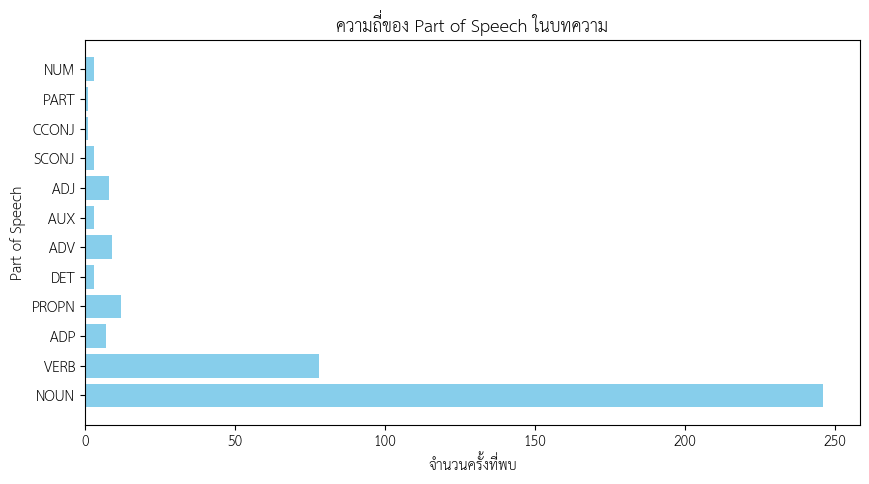

In [67]:
# Step 2 : Plotting Graph 

## 2.1 : create xlabel , ylabel
tag_name = [tag for [count , tag] in tags_frequency_count.items()]
tag_count = [count for [count , tag] in tags_frequency_count.items()]

## 2.2 : plot
plt.figure(figsize=(10,5)) # size of grap 
plt.barh(tag_count, tag_name, color='skyblue') # horizontal bar plot 

## 2.3 : Decorate 
plt.title("ความถี่ของ Part of Speech ในบทความ")
plt.xlabel("จำนวนครั้งที่พบ") 
plt.ylabel("Part of Speech") 

### 6.  News article นี้มีท้ังหมดกี่ประโยค (sentence)

In [68]:
from pythainlp.tokenize import sent_tokenize
sentence_tokenized = sent_tokenize(news_article)
print(sentence_tokenized)
print("Number of sentence:" , len(sentence_tokenized))

['ปัญหาความเหลื่อมล้ำไม่ได้เกิดขึ้นแค่ในประเทศไทย ', 'แต่เกิดขึ้นกับประเทศมหาอำนาจอย่างสหรัฐฯ\nเช่นเดียวกัน ', 'ทางออกที่สหรัฐฯ กำลังจะทำคือการร่างกฎหมาย ', '‘การเก็บภาษีมหาเศรษฐี’ ขึ้นมาเพื่อแก้ปัญหานี้\n ซึ่งถูกเสนอโดยพรรคเดโมแครต ', 'เพื่อที่จะนำเงินจากภาษีเหล่านี้มาใช้กับโครงข่ายรองรับทางสังคม (Social\nSafety Net) ไม่ว่าจะเป็นการช่วยเหลือผู้ที่ได้รับผลกระทบจากวิกฤตต่างๆ ผู้ที่ตกงาน ผู้ด้อยโอกาส เป็นต้น\nมหาเศรษฐีที่รวยที่สุดในโลก ณ เวลานี้คือ อีลอน มัสก์ โดยบริษัทรถยนต์ไฟฟ้าของเขาอย่าง Tesla\nแทบจะเรียกได้ว่าถูกสร้างขึ้นมาด้วยเงินของรัฐบาลเลยก็ว่าได้ ', 'เนื่องจากหลายปีที่ผ่านมารัฐบาลต้อง\nการจูงใจให้ประชาชนใช้รถยนต์ไฟฟ้ามากขึ้น ', 'จึงออกนโยบายต่างๆ เพื่อสนับสนุน\nโดยบริษัทที่ได้รับ ผลประโยชน์ไปเต็มๆ เลยคือ Tesla ซึ่งผลกำไรส่วนใหญ่ในปัจจุบันของบริษัทมาจากการขายเครดิตรถยนต์ไฟฟ้า\nที่รัฐบาลกำหนดให้ผู้ผลิตรถยนต์ต่างๆ ต้องผลิตรถยนต์ไฟฟ้าให้ได้ตามจำนวนที่กำหนด ', 'ถ้าผลิตไม่ถึงที่กำหนดจะ\nต้องจ่ายค่าปรับเป็นจำนวนมหาศาล ', 'ทำให้ผู้ผลิตรถยนต์รายอื่นๆ ', 'ต้องมาซื้อเครดิตจาก Tesla แทน ',